In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-06-09 13:32:24.880491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 13:32:24.880591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 13:32:25.029974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Data

In [4]:
data_dir = '/kaggle/input/fer-custom-data/FER_Custom_Dataset'

In [5]:
# Parameters
batch_size = 32
img_height = 224
img_width = 224

# Load the dataset
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Check the class names
class_names = train_dataset.class_names
print(class_names)





Found 43819 files belonging to 3 classes.
Using 35056 files for training.
Found 43819 files belonging to 3 classes.
Using 8763 files for validation.
['Disappointed', 'interested', 'neutral']


# Visualization of Data

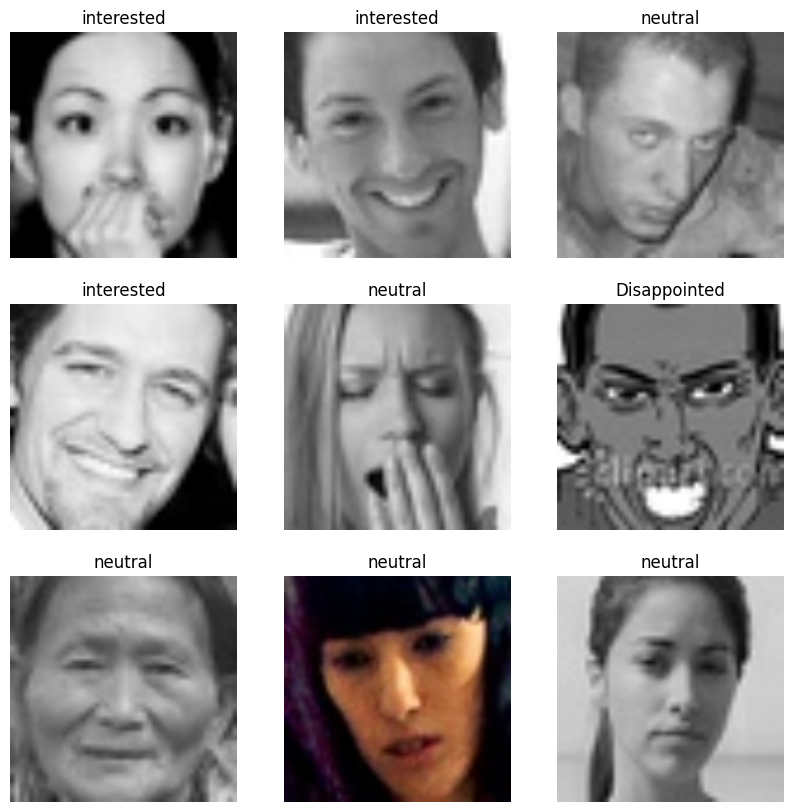

In [6]:
# Visualize some of the training images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# CNN model Architecture

In [7]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

# Print the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)


# Training the Model

In [9]:
epochs = 10  # You can increase this based on your requirements

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)


Epoch 1/10
   3/1096 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.3698 - loss: 87.8447  

I0000 00:00:1717940040.352083     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717940040.371539     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3921 - loss: 3.5154

W0000 00:00:1717940090.653983     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 71s 55ms/step - accuracy: 0.3921 - loss: 3.5135 - val_accuracy: 0.3964 - val_loss: 1.0899
Epoch 2/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 49s 44ms/step - accuracy: 0.3991 - loss: 1.0887 - val_accuracy: 0.4036 - val_loss: 1.0867
Epoch 3/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.4077 - loss: 1.0843 - val_accuracy: 0.3991 - val_loss: 1.0873
Epoch 4/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.4206 - loss: 1.0747 - val_accuracy: 0.3913 - val_loss: 1.0986
Epoch 5/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.4316 - loss: 1.0627 - val_accuracy: 0.4035 - val_loss: 1.1097
Epoch 6/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.4334 - loss: 1.0605 - val_accuracy: 0.3997 - val_loss: 1.1233
Epoch 7/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.4486 - loss: 1.0389 - val_accuracy: 0.3991 - val_loss: 1.1828
Epoch 8/10
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.4661 - loss: 1.02

# Evaluate the Model

In [10]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4051 - loss: 1.2558
Validation Loss: 1.2457650899887085
Validation Accuracy: 0.4078511893749237


# Visualize Training Results

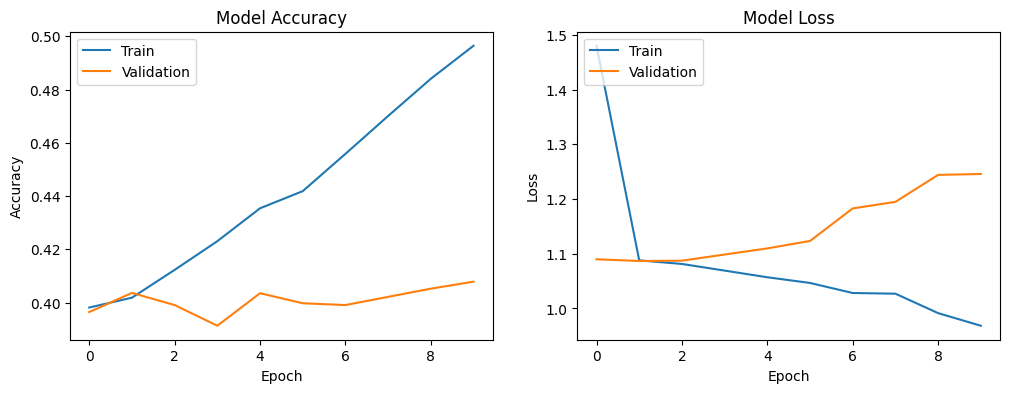

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Save the Model

In [14]:
model.save('/kaggle/working/model.h5')

# Load the Saved Model

In [15]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/model.h5')


# Webcam for Live Detection

In [ ]:
import cv2
import numpy as np

img_height = 224
img_width = 224
class_names = ['class1', 'class2', 'class3']  # Replace with your actual class names

cap = cv2.VideoCapture(0)  # Change the index if you have multiple cameras

while True:

    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image")
        break

    # Preprocess the frame
    img = cv2.resize(frame, (img_width, img_height))
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # Display the result
    label = f"{class_names[predicted_class]}: {confidence:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow('Live Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
    cap.release()
cv2.destroyAllWindows()
